In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import skimage.io as sk
import scipy.ndimage.morphology as mp
from skimage import color

In [2]:
#structure elements

T = []
T.append((np.array([1,1,1,
                    0,0,1,
                    0,0,0]).reshape(3,3),
          np.array([0,0,0,
                    0,1,0,
                    0,0,0]).reshape(3,3))) #T1

T.append((np.array([1,1,0,
                    1,0,0,
                    1,0,0]).reshape(3,3),
          np.array([0,0,0,
                    0,1,0,
                    0,0,0]).reshape(3,3))) #T2

T.append((np.array([0,0,0,
                    1,0,0,
                    1,1,1]).reshape(3,3),
          np.array([0,0,0,
                    0,1,0,
                    0,0,0]).reshape(3,3))) #T3

T.append((np.array([0,0,1,
                    0,0,1,
                    0,1,1]).reshape(3,3),
          np.array([0,0,0,
                    0,1,0,
                    0,0,0]).reshape(3,3))) #T4
T.append((np.array([1,1,1,
                    1,0,0,
                    0,0,0]).reshape(3,3),
          np.array([0,0,0,
                    0,1,0,
                    0,0,0]).reshape(3,3))) #T5
T.append((np.array([1,0,0,
                    1,0,0,
                    1,1,0]).reshape(3,3),
          np.array([0,0,0,
                    0,1,0,
                    0,0,0]).reshape(3,3))) #T6
T.append((np.array([0,0,0,
                    0,0,1,
                    1,1,1]).reshape(3,3),
          np.array([0,0,0,
                    0,1,0,
                    0,0,0]).reshape(3,3))) #T7
T.append((np.array([0,1,1,
                    0,0,1,
                    0,0,1]).reshape(3,3),
          np.array([0,0,0,
                    0,1,0,
                    0,0,0]).reshape(3,3))) #T8

In [3]:
def thickening(X, T):
    A = mp.binary_erosion(X, T[0])
    B = mp.binary_erosion((1 - X), T[1])
    C = np.logical_and(A, B)
    D = np.logical_or(X, C)
    return D

def сonvex_shell(image):
    print("Start calculation of the convex shell...")
    A = image
    C = []
    iterations = 0
    while not np.array_equal(C, A):
        C = A
        for i in range(0, len(T)):
            A = thickening(A, T[i])
        iterations += 1
        if (iterations % 100 == 0):            
            plt.figure(figsize=(8, 8))
            plt.axis('off')
            plt.title(str(iterations) + "-th iteration.")
            sk.imshow(A)
    result = A
    print("Convex shell is calculated with " + str(iterations) + " iterations.\n")
    return result

def example_сonvex_shell(image):
    result = сonvex_shell(image)

    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.title('Convex shell')
    sk.imshow(result)

Start calculation of the convex shell...
Convex shell is calculated with 502 iterations.



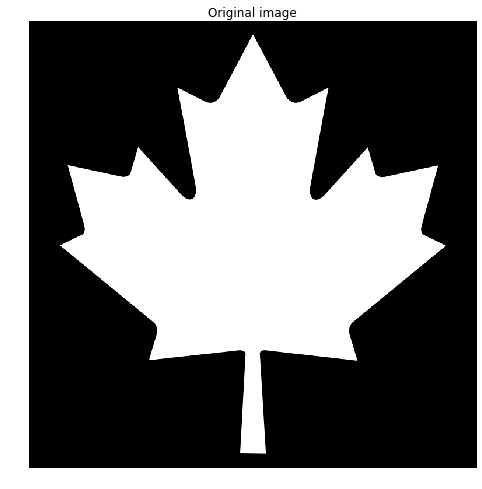

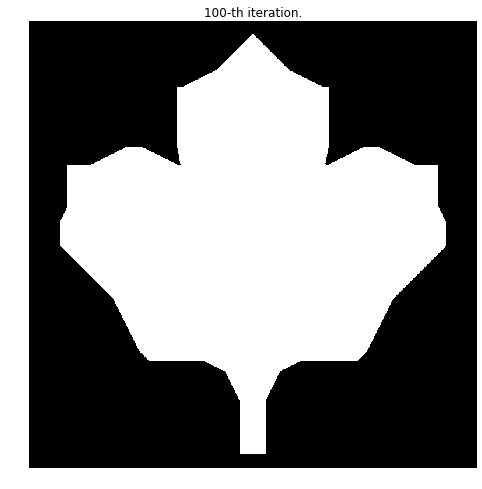

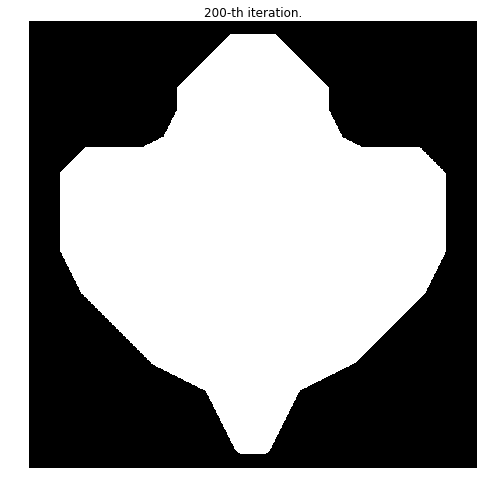

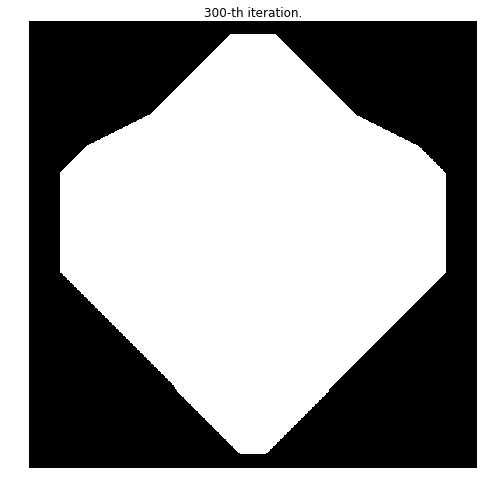

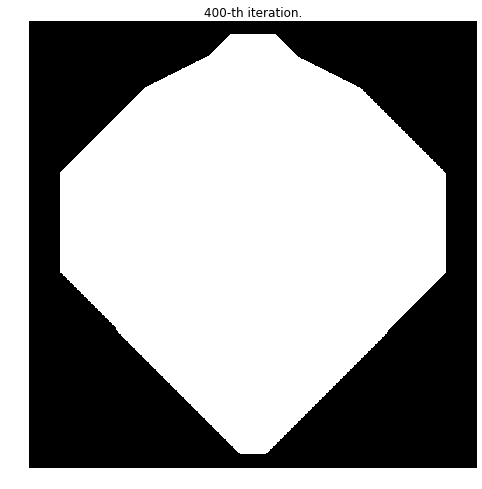

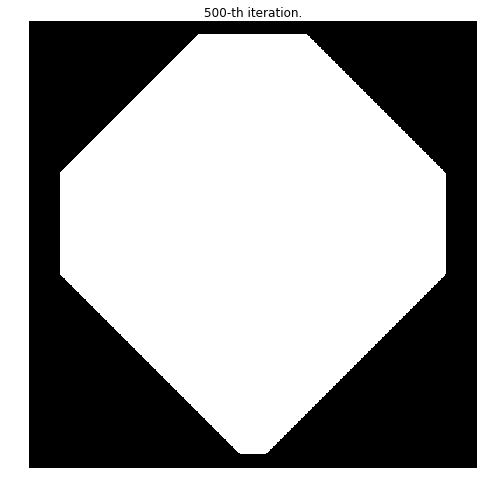

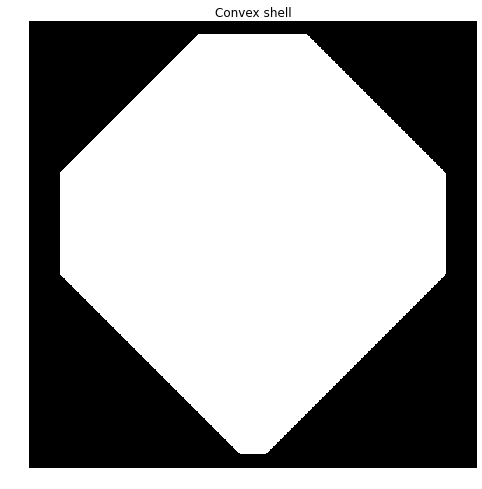

In [4]:
image = sk.imread("leaf.png")

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Original image')
sk.imshow(image)

example_сonvex_shell(image)

Start calculation of the convex shell...
Convex shell is calculated with 86 iterations.



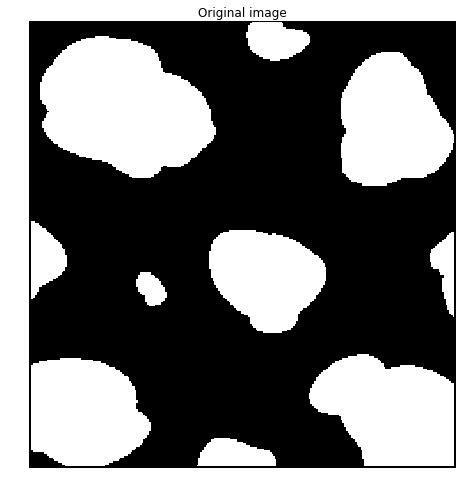

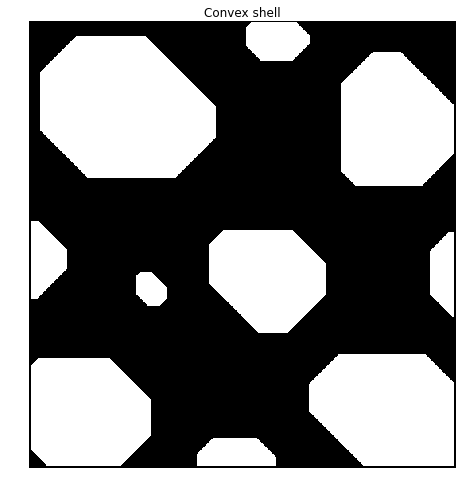

In [5]:
image = sk.imread("spots.png")
image = color.rgb2gray(image) >= 0.5

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Original image')
sk.imshow(image)

example_сonvex_shell(image)